In [52]:
import os
import pandas as pd
import numpy as np
import json
import joblib
import pickle
import requests
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns



### Reading Data

In [53]:
df = pd.read_csv(r'/Users/joaopinto/projects/Capstone-LDSA/data/two-years-recid.csv')
df.head()

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_charge_degree,c_charge_desc,juv_fel_count,juv_misd_count,juv_other_count,priors_count,compas_screening_date,type_of_assessment,decile_score,score_text,v_type_of_assessment,v_decile_score,v_score_text,is_recid,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaN,F,False Imprisonment,0,0,0,0,2013-01-05,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaN,M,Battery,0,0,0,1,2013-04-03,Risk of Recidivism,3,Low,Risk of Violence,3,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,NaN,M,DUI Level 0.15 Or Minor In Veh,0,0,0,8,2014-10-31,Risk of Recidivism,4,Low,Risk of Violence,2,Low,1,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,2014-01-23,F,arrest case no charge,0,1,0,1,2014-01-23,Risk of Recidivism,10,High,Risk of Violence,10,High,1,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaN,M,Battery,0,0,0,0,2013-12-09,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


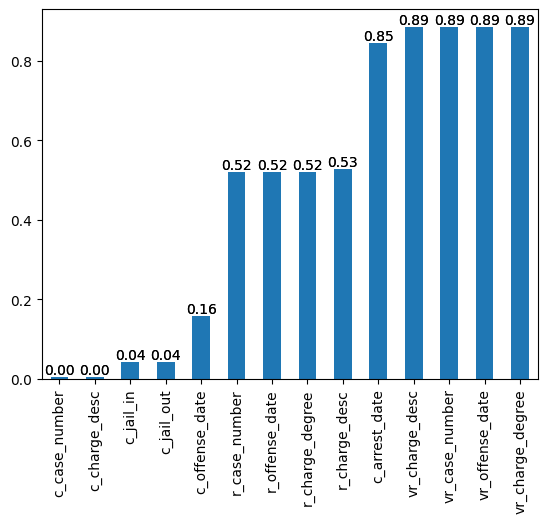

In [54]:
nas=df.isna().sum().apply(lambda x: x/len(df)).sort_values()
nas_plot= nas[nas!=0]
nas_plot.plot(kind='bar')
# Plot the bar chart
ax = nas_plot.plot(kind='bar', label=True)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Display the plot
plt.show()

### Feature Engineering

#### Preprocessing

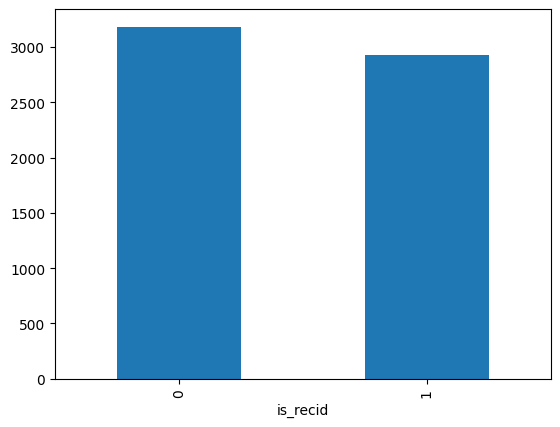

In [55]:
target = 'is_recid'
y = df[target]
y.value_counts().plot(kind='bar');

In [56]:
X = df[[col for col in df.columns if col != target]]

drop_cols = [
    #'id',
    'name',
    'dob',
    'race',
    'score_text',
    #'is_recid',
    #'c_jail_in',
    #'c_jail_out',
    'c_case_number',
    'compas_screening_date',
    'c_offense_date',
    'c_arrest_date',
    'r_case_number',
    'r_offense_date',
    'vr_case_number',
    'vr_offense_date',
    'vr_charge_degree',
    'vr_charge_desc',
    'vr_charge_degree',	
    'vr_case_number',
    'vr_offense_date',	
    'vr_charge_desc',
    'two_year_recid',
    
]

X = X.drop(columns=drop_cols).set_index('id')
X.head()


,sex,age,c_jail_in,c_jail_out,c_charge_degree,c_charge_desc,juv_fel_count,juv_misd_count,juv_other_count,priors_count,type_of_assessment,decile_score,v_type_of_assessment,v_decile_score,v_score_text,r_charge_degree,r_charge_desc,is_violent_recid
id,,,,,,,,,,,,,,,,,,
1,Male,62,2013-01-05 04:35:31,2013-01-07 03:18:03,F,False Imprisonment,0,0,0,0,Risk of Recidivism,1,Risk of Violence,1,Low,NaN,NaN,0
2,Male,28,2013-04-02 12:18:46,2013-04-04 07:54:22,M,Battery,0,0,0,1,Risk of Recidivism,3,Risk of Violence,3,Low,NaN,NaN,0
3,Male,57,2014-10-31 12:02:01,2014-10-31 01:47:05,M,DUI Level 0.15 Or Minor In Veh,0,0,0,8,Risk of Recidivism,4,Risk of Violence,2,Low,(M2),Driving License Suspended,0
4,Male,19,2014-01-23 03:19:30,2014-01-23 01:04:34,F,arrest case no charge,0,1,0,1,Risk of Recidivism,10,Risk of Violence,10,High,(M1),Possess Cannabis/20 Grams Or Less,0
5,Female,37,2013-12-08 01:55:28,2013-12-09 02:00:59,M,Battery,0,0,0,0,Risk of Recidivism,1,Risk of Violence,1,Low,NaN,NaN,0


#### Custom Transformers

In [57]:
class DateTimeConverter(BaseEstimator, TransformerMixin):
    """
    A custom transformer to convert specified columns of a DataFrame to lowercase.
    """
    
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        # Nothing to do here as there's no fitting process for lowering case
        return self    
    
    def transform(self, X):
        """
        Transform string columns into datetime columns to the DataFrame.
        
        Parameters:
        X (pd.DataFrame): The DataFrame to modify.

        Returns:
        pd.DataFrame: The DataFrame with lowercase columns.
        """
        X = X.copy()  # Create a copy of the input DataFrame to avoid changing the original data
        for column in self.columns:
            if column in X.columns:
                X[column] = pd.to_datetime(X[column],errors='coerce')
            else:
                print(f"Warning: '{column}' does not exist in the DataFrame.")
        return X

In [58]:
class CalculateJailTime(BaseEstimator, TransformerMixin):
    """
    A custom transformer to convert specified columns of a DataFrame to lowercase.
    """
    
    def fit(self, X, y=None):
        # Nothing to do here as there's no fitting process for lowering case
        return self    
    
    def transform(self, X):
            X = X.copy()
            if 'c_jail_out' in X.columns and 'c_jail_in' in X.columns:
                X['c_jail_time'] = (X['c_jail_out'] - X['c_jail_in']).dt.days
            else:
                print("Warning: Required columns for calculating jail time do not exist in the DataFrame.")
            return X

### Pipeline

In [59]:
# Define the initial numeric and categorical features
initial_numeric_features = [
    'age',
    'decile_score',
    'juv_fel_count',	
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
]

categorical_features = [col for col in X.columns if col not in initial_numeric_features and col not in ['c_jail_out', 'c_jail_in']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer with an empty list of numeric features initially
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_include=['int64', 'float64'])),
        ('cat', categorical_transformer, selector(dtype_include=['object', 'category']))
    ]
)
# Create the full pipeline including custom transformers
pipeline = Pipeline(steps=[
    ('datetime_converter', DateTimeConverter(columns=['c_jail_out', 'c_jail_in'])),
    ('jail_time_calculator', CalculateJailTime()),
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.1, penalty='l2', random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Cross Validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('datetime_converter',
                 DateTimeConverter(columns=['c_jail_out', 'c_jail_in'])),
                ('jail_time_calculator', CalculateJailTime()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c9b5a50>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c9b6f80>)])),
                ('classifier', LogisticRegression(C=0.1, random_state=42))])

In [60]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')
print(f'Accuracy: {round(accuracy, 4)}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'F1 Score: {round(f1, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Recall: {round(recall, 4)}')

Cross-Validation Accuracy Scores: [0.97056419 0.97219951 0.99836468 0.99509403 0.99263502]
Mean Cross-Validation Accuracy: 0.9857714856949388
Accuracy: 0.9608
Confusion Matrix:
[[625   0]
 [ 48 550]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       625
           1       1.00      0.92      0.96       598

    accuracy                           0.96      1223
   macro avg       0.96      0.96      0.96      1223
weighted avg       0.96      0.96      0.96      1223

F1 Score: 0.9607
Precision: 0.9636
Recall: 0.9608


|    | Feature Name                                   |   Feature Importance |
|---:|:-----------------------------------------------|---------------------:|
|  0 | r_charge_degree_Possession Burglary Tools      |            -4.46797  |
|  1 | r_charge_degree_Agg Assault W/int Com Fel Dome |            -1.91533  |
|  2 | sex_Male                                       |             1.16921  |
|  3 | v_score_text_(F7)                              |             0.799595 |
|  4 | r_charge_degree_Agg Battery Grt/Bod/Harm       |             0.693805 |
|  5 | r_charge_degree_Retail Theft                   |             0.484414 |
|  6 | v_decile_score_High                            |            -0.375929 |
|  7 | c_charge_desc_Possess Drug Paraphernalia       |             0.37139  |
|  8 | age                                            |            -0.341601 |
|  9 | r_charge_degree_Pos Cannabis W/Intent Sel/Del  |             0.338974 |
| 10 | juv_other_count                              

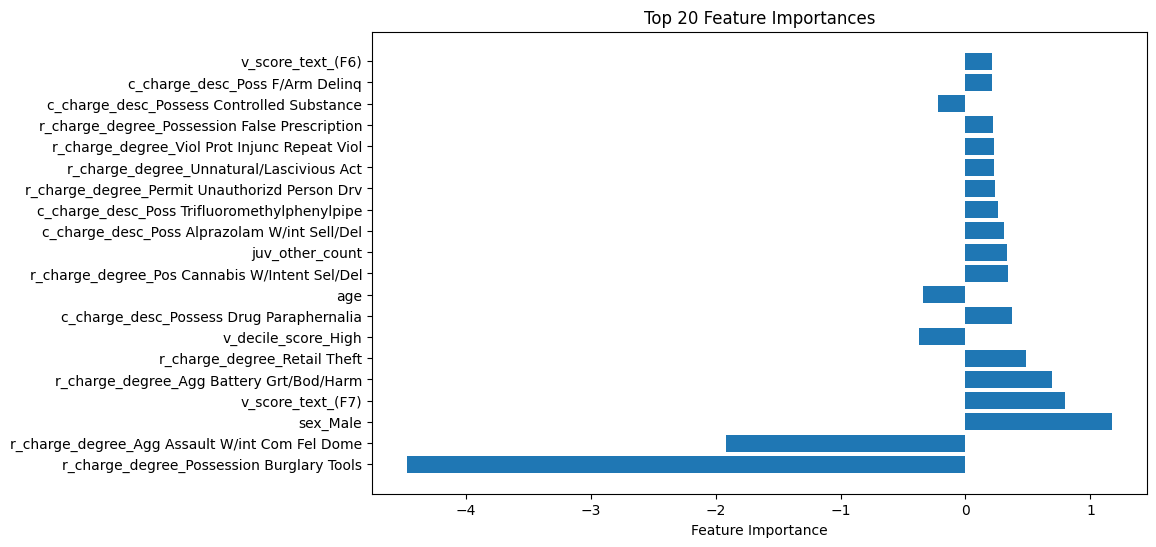

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the LogisticRegression classifier from the pipeline
classifier = pipeline.named_steps['classifier']

# Extract the one-hot encoder from the pipeline
onehot_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Get original categorical feature names
categorical_features_original = [col for col in X.columns if col not in initial_numeric_features and col not in ['c_jail_out', 'c_jail_in']]

# Initialize list to store feature names
feature_names_encoded_with_original = []

# Iterate over each categorical feature and its one-hot encoded features
for feature_name, categories in zip(categorical_features_original, onehot_encoder.categories_):
    for category in categories:
        feature_names_encoded_with_original.append(f"{feature_name}_{category}")

# Combine all feature names
feature_names = initial_numeric_features + feature_names_encoded_with_original

# Get coefficients of the features from the classifier
coefficients = classifier.coef_[0]

# Combine feature names and coefficients
feature_importances = list(zip(feature_names, coefficients))

# Sort feature importances by their absolute values
feature_importances.sort(key=lambda x: abs(x[1]), reverse=True)

top = 20

# Extract top 10 features and their importances
top_features = [feature[0] for feature in feature_importances[:top]]
top_importances = [feature[1] for feature in feature_importances[:top]]


print(pd.DataFrame(feature_importances,columns=['Feature Name','Feature Importance']).head(20).to_markdown())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_features)), top_importances, align='center')
plt.yticks(np.arange(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title(f'Top {top} Feature Importances')
plt.show()


### Serialization

In [62]:
import joblib


with open('columns.json', 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)
    

joblib.dump(pipeline, 'pipeline.pickle') 

['pipeline.pickle']

### Discrimination Test

In [93]:
grouped = X_test.reset_index().merge(df[['id','race','is_recid']],on='id',how='left')

grouped['Pred'] = y_pred
grouped = grouped.groupby('race').agg({'id':'count','Pred':'sum','is_recid':'sum'})

grouped['Recidivism Prediction %'] = (grouped['Pred'] / grouped['id']) * 100
grouped['Actual Recidivism %'] = (grouped['is_recid'] / grouped['id']) * 100
print(grouped.to_markdown())
grouped = grouped.reset_index()

| race             |   id |   Pred |   is_recid |   Recidivism Prediction % |   Actual Recidivism % |
|:-----------------|-----:|-------:|-----------:|--------------------------:|----------------------:|
| African-American |  639 |    326 |        360 |                   51.0172 |               56.338  |
| Asian            |    7 |      1 |          2 |                   14.2857 |               28.5714 |
| Caucasian        |  422 |    171 |        178 |                   40.5213 |               42.1801 |
| Hispanic         |  100 |     29 |         32 |                   29      |               32      |
| Native American  |    4 |      3 |          3 |                   75      |               75      |
| Other            |   51 |     20 |         23 |                   39.2157 |               45.098  |


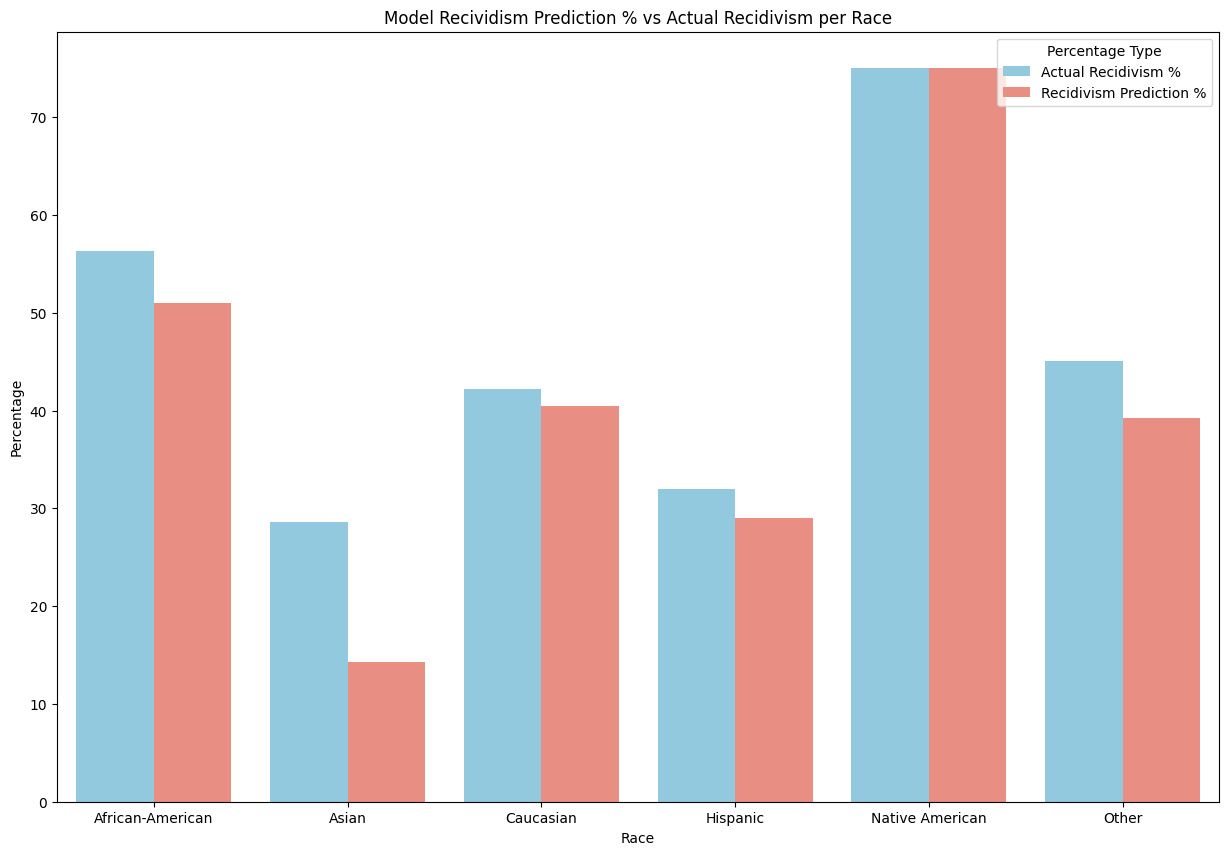

In [96]:

# Melt the DataFrame to a long format
grouped_melted = grouped.melt(id_vars='race', value_vars=['Actual Recidivism %','Recidivism Prediction %', ],
                              var_name='Percentage Type', value_name='Percentage')

plt.figure(figsize=(15, 10))

# Plot the bar plot with hue
sns.barplot(data=grouped_melted, x='race', y='Percentage', hue='Percentage Type', palette=['skyblue', 'salmon'])

# Set labels and titles
plt.title('Model Recividism Prediction % vs Actual Recidivism per Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.legend(title='Percentage Type', loc='upper right')
plt.show()

### Model Choice

In [ ]:
raise ValueError
# Define a dictionary of models with their respective parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    #'Random Forest': {
    #    'model': RandomForestClassifier(),
    #    'params': {
    #        'classifier__n_estimators': [100, 200, 300],
    #        'classifier__max_depth': [None, 5, 10, 20],
    #        'classifier__min_samples_split': [2, 5, 10],
    #        'classifier__min_samples_leaf': [1, 2, 4],
    #        'classifier__bootstrap': [True, False]
    #    }
    #},
    #'Support Vector Machine': {
    #    'model': SVC(),
    #    'params': {
    #        'classifier__C': [0.1, 1.0, 10.0],
    #        'classifier__kernel': ['linear', 'rbf']
    #    }
    #},
    #'AdaBoost': {
    #    'model': AdaBoostClassifier(),
    #    'params': {
    #        'classifier__n_estimators': [50, 100, 200],
    #        'classifier__learning_rate': [0.01, 0.1, 1.0]
    #    }
    #},
    #'Gradient Boosting': {
    #    'model': GradientBoostingClassifier(),
    #    'params': {
    #        'classifier__n_estimators': [50, 100, 200],
    #        'classifier__learning_rate': [0.01, 0.1, 1.0],
    #        'classifier__max_depth': [3, 5, 7]
    #    }
    #},
    #'K-Nearest Neighbors': {
    #    'model': KNeighborsClassifier(),
    #    'params': {
    #        'classifier__n_neighbors': [3, 5, 7],
    #        'classifier__weights': ['uniform', 'distance']
    #    }
    #},
    #'Multi-layer Perceptron': {
    #    'model': MLPClassifier(),
    #    'params': {
    #        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    #        'classifier__activation': ['logistic', 'relu'],
    #        'classifier__alpha': [0.0001, 0.001, 0.01]
    #    }
    #}
}

# Test each model using grid search for hyperparameter tuning
for name, model_info in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_info['model'])])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"F1 Score: {round(grid_search.best_score_,2)}")


ValueError: 